# Trabalho Modulo 6 - Grupo: Catia, Eduardo, Jadhy, Laércio e Poliana

## Dataset Utilizado: YouTube Trending Video Dataset (updated daily) - https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=BR_category_id.json

## Dataset é atualizado todo dia no Kaggle. Sendo assim, o utilizado em questão, foi baixado dia 26/03/2023

### Perguntas a serem respondidas:

#### 1 - Por que alguns vídeos ficaram com 0 visualizações?

#### 2- Qual foi o vídeo que ficou no top trending por mais tempo? Quanto tempo foi?

#### 3 - Qual Categoria mais assistida? (TOP 5)

      - Top 5 do top 5 (imagenzinha)

#### 4 - Qual canal mais assistido? Quem teve mais vídeos no top trending?

#### 5 - Existe alguma categoria que tenha mais Likes? e Dislikes?

#### 6 - Existe relação entre a quantidade de views, likes, dislikes e comentário?

#### 7 - Existe algum canal ou categoria que tem mais tendências a desabilitar comentários?

#### 8 - Vídeos que ficam mais tempo no top trendings recebe mais views que a média?

### Extra

#### 9 - Nuvem de palavras das Tags  

#### 10 - Nuvem de palavras das Descrições

#### 11 - Thumbnail de Thumbnail

Importação das bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Dados nulos somente na categoria description

Id da categoria equivalente a um número no json, por isso é int



In [2]:
df = pd.read_csv('dados/BR_youtube_trending_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192191 entries, 0 to 192190
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           192191 non-null  object
 1   title              192191 non-null  object
 2   publishedAt        192191 non-null  object
 3   channelId          192191 non-null  object
 4   channelTitle       192191 non-null  object
 5   categoryId         192191 non-null  int64 
 6   trending_date      192191 non-null  object
 7   tags               192191 non-null  object
 8   view_count         192191 non-null  int64 
 9   likes              192191 non-null  int64 
 10  dislikes           192191 non-null  int64 
 11  comment_count      192191 non-null  int64 
 12  thumbnail_link     192191 non-null  object
 13  comments_disabled  192191 non-null  bool  
 14  ratings_disabled   192191 non-null  bool  
 15  description        183158 non-null  object
dtypes: bool(2), int64(5)

Importando os dados da categoria e adicionando-os como uma nova coluna no dataset.

In [3]:
import json
with open('dados/BR_category_id.json') as user_file:
    ytb_json = user_file.read()
    
data = json.loads(ytb_json)
categorias = []
for i in data["items"]:
    categorias.append([int(i['id']),i['snippet']['title']])
    
df = df.merge(pd.DataFrame(categorias, columns=['categoryId', 'category_name']), on = 'categoryId', how = 'left')

display(categorias)

[[1, 'Film & Animation'],
 [2, 'Autos & Vehicles'],
 [10, 'Music'],
 [15, 'Pets & Animals'],
 [17, 'Sports'],
 [18, 'Short Movies'],
 [19, 'Travel & Events'],
 [20, 'Gaming'],
 [21, 'Videoblogging'],
 [22, 'People & Blogs'],
 [23, 'Comedy'],
 [24, 'Entertainment'],
 [25, 'News & Politics'],
 [26, 'Howto & Style'],
 [27, 'Education'],
 [28, 'Science & Technology'],
 [29, 'Nonprofits & Activism'],
 [30, 'Movies'],
 [31, 'Anime/Animation'],
 [32, 'Action/Adventure'],
 [33, 'Classics'],
 [34, 'Comedy'],
 [35, 'Documentary'],
 [36, 'Drama'],
 [37, 'Family'],
 [38, 'Foreign'],
 [39, 'Horror'],
 [40, 'Sci-Fi/Fantasy'],
 [41, 'Thriller'],
 [42, 'Shorts'],
 [43, 'Shows'],
 [44, 'Trailers']]

In [4]:
df.head()

video_id                                              title  \
0  s9FH4rDMvds     LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!   
1  jbGRowa5tIk                          ITZY “Not Shy” M/V TEASER   
2  3EfkCrXKZNs                      Oh Juliana PARÓDIA - MC Niack   
3  gBjox7vn3-g   Contos de Runeterra: Targon | A Estrada Tortuosa   
4  npoUGx7UW7o  Entrevista com Thammy Miranda | The Noite (10/...   

            publishedAt                 channelId  \
0  2020-08-11T22:21:49Z  UCGfBwrCoi9ZJjKiUK8MmJNw   
1  2020-08-11T15:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg   
2  2020-08-10T14:59:00Z  UCoXZmVma073v5G1cW82UKkA   
3  2020-08-11T15:00:09Z  UC6Xqz2pm50gDCORYztqhDpg   
4  2020-08-11T20:04:02Z  UCEWOoncsrmirqnFqxer9lmA   

                   channelTitle  categoryId         trending_date  \
0                 Pietro Guedes          22  2020-08-12T00:00:00Z   
1             JYP Entertainment          10  2020-08-12T00:00:00Z   
2                 As Irmãs Mota          22  2020-08-12T00:00:00Z   
3          League of Legends BR          20  2020-08-12T00:00:00Z   
4  The Noite com Danilo Gentili          23  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...      263835   85095   
1  JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...     6000070  714310   
2  OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...     2296748   39761   
3  Riot|Riot Games|League of Legends|lol|trailer|...      300510   46222   
4  The Noite|The Noite com Danilo Gentili|Danilo ...      327235   22059   

   dislikes  comment_count                                  thumbnail_link  \
0       487           4500  https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg   
1     15176          31040  https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg   
2      5484              0  https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg   
3       242           2748  https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg   
4      3972           2751  https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2               True             False   
3              False             False   
4              False             False   

                                         description   category_name  
0  Salve rapaziada, neste vídeo me declarei pra e...  People & Blogs  
1  ITZY Not Shy M/V[ITZY Official] https://www.yo...           Music  
2  Se inscrevam meus amores! 📬 Quer nos mandar al...  People & Blogs  
3  Você se unirá aos Lunari e aos Solari em Targo...          Gaming  
4  Danilo Gentili recebe Thammy Miranda. Após pas...          Comedy

Observamos que alguns view_counts estão como 0 - investigar

Likes, dislikes e comentarios 0 - provavelmente desabilitados

Observamos uma discrepância nos valores do view_count, nos quais alguns vídeos tem muitas visualizações, mas a metade inferior não. Isso é um fator que influencia na média, como percebido, assim como no 75% percentil e no valor máximo, que é 3 casas maior que o 25% percentil. 

Assim, decidimos investigar mais através do gráfico a seguir.

In [5]:
df.describe()

categoryId    view_count         likes       dislikes  comment_count
count  192191.000000  1.921910e+05  1.921910e+05  192191.000000   1.921910e+05
mean       18.659521  1.516158e+06  1.015170e+05    1068.332612   7.578501e+03
std         5.984263  5.514180e+06  3.653395e+05    7992.269498   8.276022e+04
min         1.000000  0.000000e+00  0.000000e+00       0.000000   0.000000e+00
25%        17.000000  1.953285e+05  1.365300e+04       0.000000   4.350000e+02
50%        20.000000  4.593080e+05  3.060000e+04      39.000000   1.107000e+03
75%        24.000000  1.136158e+06  7.697550e+04     488.000000   2.881000e+03
max        29.000000  2.780806e+08  1.621376e+07  848980.000000   6.817450e+06

Observamos que alguns vídeos de fato tem valor muito elevado.

Mudando a escala para log, observamos ainda a discrepância, mas que a maioria dos valores flutua na escala de 10⁵ a 10⁷

Text(0, 0.5, 'View_Count')

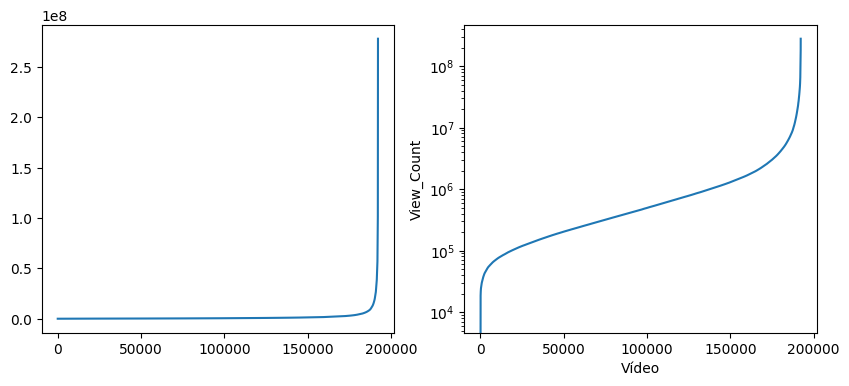

In [6]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(sorted(df.view_count))
plt.yscale("linear")
ax[1].plot(sorted(df.view_count))
plt.yscale("log")

plt.xlabel("Vídeo")
plt.ylabel("View_Count")

Considerando o vídeo apenas uma vez, com o seu maior número de visualizações, observamos que a partir de 17 vídeos, já cai de 100 milhões.

Além de cair de 200 milhões para 100 milhões muito rápido.

In [7]:
len(df.video_id.unique())

29242

Text(0, 0.5, 'View_Count')

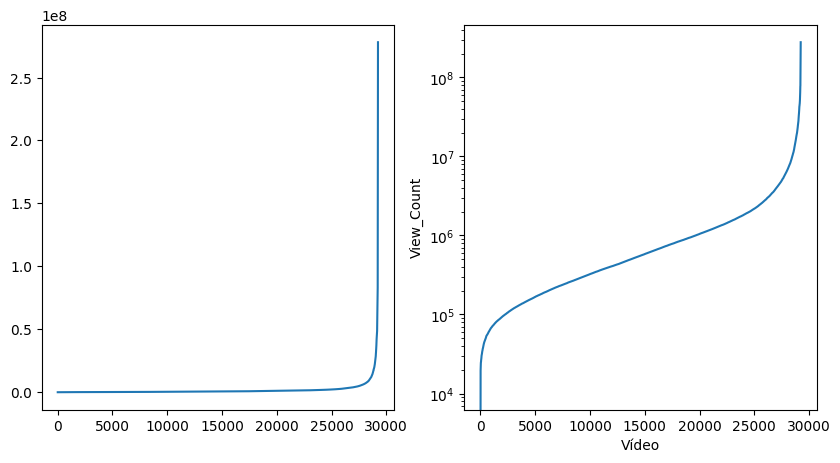

In [8]:
mais_views = df.sort_values(by =['video_id','view_count'], ascending = False).drop_duplicates('video_id', keep = 'first')
fig,ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(sorted(mais_views.view_count))
plt.yscale("linear")
ax[1].plot(sorted(mais_views.view_count))
plt.yscale("log")

plt.xlabel("Vídeo")
plt.ylabel("View_Count")

<AxesSubplot: xlabel='view_count', ylabel='title'>

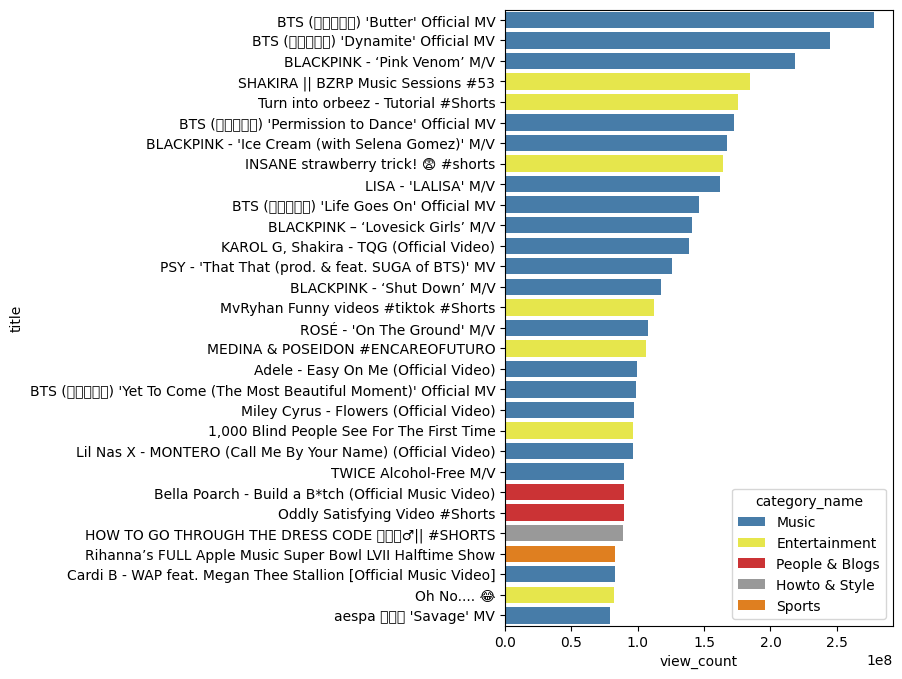

In [9]:
categ = df['category_name'].unique()
clrs = dict(zip(categ, sns.color_palette("Set1", n_colors=len(categ))))


dados = mais_views.sort_values(by =['view_count'], ascending = False).head(30)
plt.figure(figsize=(5,8))
sns.barplot(data=dados, y='title', x='view_count', hue='category_name', dodge=False, palette=clrs)

#### 1 - Por que alguns vídeos ficaram com 0 visualizações?

Os vídeos com 0 visualisações se tratam de Doodles criados pela Google de alguma data comemorativa. Sendo assim, tem as visualisações, curtidas e comentários desabilitados.

Existe uma excessão que é um Vídeo da Anitta que foi privado e teve o contador de views perdido, e o contador de curtidas e comentários, provavelmente, foi atualizado no último dia antes de ser privado. Como esse vídeo não pode ser atualizado e possui dados faltantes, será desconsiderado.

In [10]:
df[df.view_count == 0]

video_id                             title           publishedAt  \
33198   2IEoyPpoYmY  Anitta | RELEASED (Full Episode)  2021-01-29T05:05:26Z   
49793   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
50001   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
50222   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
50445   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
50673   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
50893   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
51124   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
51352   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
51576   hAxqygRdM4g             Earth Day 2021 Doodle  2021-04-21T11:00:14Z   
79796   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
80029   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
80242   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
80485   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
80721   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
80953   BxOEj8ZeX2g      Tim Bergling's 32nd Birthday  2021-09-07T12:00:08Z   
103801  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
104022  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
104249  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
104482  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
104714  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
104953  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   
105189  Isim0ysZ6X4   Stephen Hawking's 80th Birthday  2022-01-07T18:40:13Z   

                       channelId   channelTitle  categoryId  \
33198   UCqjjyPUghDSSKFBABM_CXMw         Anitta          10   
49793   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
50001   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
50222   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
50445   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
50673   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
50893   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
51124   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
51352   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
51576   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
79796   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
80029   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
80242   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
80485   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
80721   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
80953   UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
103801  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
104022  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
104249  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
104482  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
104714  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
104953  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   
105189  UCdq61m8s_48EhJ5OM_MCeGw  GoogleDoodles           1   

               trending_date  \
33198   2021-01-29T00:00:00Z   
49793   2021-04-22T00:00:00Z   
50001   2021-04-23T00:00:00Z   
50222   2021-04-24T00:00:00Z   
50445   2021-04-25T00:00:00Z   
50673   2021-04-26T00:00:00Z   
50893   2021-04-27T00:00:00Z   
51124   2021-04-28T00:00:00Z   
51352   2021-04-29T00:00:00Z   
51576   2021-04-30T00:00:00Z   
79796   2021-09-09T00:00:00Z   
80029   2021-09-10T00:00:00Z   
80242   2021-09-11T00:00:00Z   
80485   2021-09-12T00:00:00Z   
80721   2021-09-13T00:00:00Z   
80953   2021-09-14T00:00:00Z   
103801  2022-01-09T00:00:00Z   
104022  2022-01-10T00:00:

#### 2- Qual foi o vídeo que ficou no top trending por mais tempo? Quanto tempo foi?

Aqui, foi observado que temos vídeos com ids diferentes e títulos iguais.

Fomos investigar no youtube, e os vídeos são de fato diferentes. Suspeitamos que tenham teor semelhante e o canal utilizou essa técnica para chamar mais atenção.

In [11]:
df.video_id.value_counts()

RjKl3lJoWjo    24
ayKblEzrfbQ    23
9-_FP5px5NE    22
jBlPu5XOgoQ    22
VvqK8s7wZU8    22
               ..
j6W50IjVIpg     1
yArDbGSE3g8     1
KLlOnq-1LY4     1
02kMQw_Pe6k     1
7q9UDPZuTi0     1
Name: video_id, Length: 29242, dtype: int64

In [12]:
df.title.value_counts()

Faro invade A Fazenda e propõe jogo que cria discórdia entre os peões                      42
TRANSFORMEI OS MOBS EM BOSSES NO MINECRAFT                                                 27
AJUDEI O MENINO POBRE A FICAR RICO NO MINECRAFT                                            26
Vigiei os MOBS quando FICAM SOZINHOS                                                       25
Você conta ou eu conto - Zé Vaqueiro                                                       24
                                                                                           ..
The Legacy of Ant-Man | Brazil Comic Con Special Look                                       1
CEARÁ 2 X 1 SPORT | MELHORES MOMENTOS | 32ª RODADA BRASILEIRÃO 2021 | ge.globo              1
FLUMINENSE 2 X 1 PALMEIRAS | MELHORES MOMENTOS | 32ª RODADA BRASILEIRÃO 2021 | ge.globo     1
O Acidente com o Ministro Teori Zavascki EP. 692                                            1
Alone                                                       

Extra - Quantos video_id com o mesmo nome?

In [13]:
grouped_df = df.groupby(df.title).agg({"video_id": "nunique"}).sort_values("video_id", ascending=False)
grouped_df[grouped_df.video_id > 1]

video_id
title                                                       
Faro invade A Fazenda e propõe jogo que cria di...         6
Trolei meu AMIGO na BATALHA DE CONSTRUÇÃO do MI...         4
RESPOSTAS DE PROVAS MAIS ENGRAÇADAS                        4
QUAL TIME GANHOU? #anime #animes #animeedit #ot...         4
Trolei meu AMIGO com CONSTRUÇÃO PRONTA na BATAL...         3
...                                                      ...
Esse Mundo Só Tem 1 Bloco de XP!                           2
TUDO QUE EU DESENHAR MEU AMIGO VAI CONSTRUIR NO...         2
BTS: Dynamite                                              2
PAIS EM 2050 😂 #shorts                                     2
TROLEI meu amigo na BATALHA DE CONSTRUÇÃO no MI...         2

[88 rows x 1 columns]

Fizemos um groupby para ver junto o video_id, título, categoria, canal e contagem de quantos dias cada um ficou no top trending

In [14]:
counts = df.groupby('video_id').agg({'title': 'first', 'channelTitle':'first', 'view_count':'last','category_name':'first', 'video_id': 'size'})
counts = counts.rename(columns={'video_id': 'contagem'})
sorted_counts = counts.sort_values(by='contagem', ascending=False)
sorted_counts

title  \
video_id                                                         
RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
Md3hQsNqQ8E                  Leo Dias entrevista Gusttavo Lima   
51-6cYoQTXE  NOSSA PRIMA FICOU LOUCA DE RAIVA !!! Família M...   
StpsccPzH2w  Papatinho - Traje de Verão ft. Péricles, MC Ha...   
...                                                        ...   
KyPVj2VIMZ8  📛BBB22: Arthur desiste de bebedeira e reclama ...   
QvqllchMVOI  Deborah e Deolane entram em novos embates dura...   
up2R3p9Kf6w         [AULA 2] Profissão Costureira | Semana CMC   
2SWpqox5vgE  GRÊMIO 0 X 1 ITUANO | MELHORES MOMENTOS | 26ª ...   
WdjVBW1Howw   INGLATERRA X PAÍS DE GALES (AO VIVO COM IMAGENS)   

                   channelTitle  view_count  category_name  contagem  
video_id                                                              
RjKl3lJoWjo         Zé Vaqueiro     3891488          Music        24  
ayKblEzrfbQ              Djonga     3199605          Music        23  
Md3hQsNqQ8E          Metrópoles     1547627  Entertainment        22  
51-6cYoQTXE    Família Maloucos      748207  Entertainment        22  
StpsccPzH2w   Papatunes Records     2338202          Music        22  
...                         ...         ...            ...       ...  
KyPVj2VIMZ8     WebTVBrasileira      399178  Entertainment         1  
QvqllchMVOI           A Fazenda      270723  Entertainment         1  
up2R3p9Kf6w      Diana Demarchi      119965  Entertainment         1  
2SWpqox5vgE                  ge      405188         Sports         1  
WdjVBW1Howw  Esporte Interativo      694366         Sports         1  

[29242 rows x 5 columns]

Queríamos fazer o top 5, mas há muitos em 3o lugar, com 22 dias. Assim, filtramos os que tinham a contagem maior ou igual a 22 para apresentação.

In [15]:
sorted_counts[sorted_counts.contagem >= 22]

title  \
video_id                                                         
RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
Md3hQsNqQ8E                  Leo Dias entrevista Gusttavo Lima   
51-6cYoQTXE  NOSSA PRIMA FICOU LOUCA DE RAIVA !!! Família M...   
StpsccPzH2w  Papatinho - Traje de Verão ft. Péricles, MC Ha...   
jBlPu5XOgoQ                TUDO SOBRE A CIRURGIA DA COLEGUINHA   
VvqK8s7wZU8                REAGINDO AS MINHAS FOTOS ARQUIVADAS   
qGCq4wrQhSg    K a m a i t a c h i - Julieta (Prod.MarcusMaia)   
BC19kwABFwc       Dua Lipa - Love Again (Official Music Video)   
s4Tcruw14zQ   Tainá Costa e MC Mari - Moreno (VideoClipe 2021)   
AtR2cfCW-1k                              TÔ NAMORANDO CARAI ❤️   
dOck3Q7DpxQ          Xand Avião - Se Valorize (Lyric Oficial)   
GwcvcTVbji0                   IZA - Gueto (Videoclipe Oficial)   
PhgJJhGhIvI  Israel & Rodolffo - Fala Na Minha Cara (Aqui e...   
zeVySDhxXqg                    Maiara e Maraisa - Incomparável   
ES_fjLSceQ0  MEU SONHO - Tarcísio do Acordeon (Clipe Oficia...   
MdhwzJmDC2s                              A GALINHA VIROU... 🐔😅   
7zYB8uUPu2M                          EXPERIMENTO DO COTONETE 😱   
9-_FP5px5NE  DIARISTA ME ENSINOU!! MEU DEUS, PORQUE ESCONDE...   
NUQvODXaF-c                  Rico vs Pobre - VIAJANDO de AVIÃO   
bMbiTgfYrTM  Gabily, MC Kevin O Chris - Bilhete Premiado ft...   
0AMYF3TOP2A           CRUELLA FOI UMA DECEPÇÃO? - SEM SPOILER!   

                                                  channelTitle  view_count  \
video_id                                                                     
RjKl3lJoWjo                                        Zé Vaqueiro     3891488   
ayKblEzrfbQ                                             Djonga     3199605   
Md3hQsNqQ8E                                         Metrópoles     1547627   
51-6cYoQTXE                                   Família Maloucos      748207   
StpsccPzH2w                                  Papatunes Records     2338202   
jBlPu5XOgoQ                                      Simone Mendes     1996611   
VvqK8s7wZU8                                         Lara Silva      668969   
qGCq4wrQhSg                                k a m a i t a c h i     1171968   
BC19kwABFwc                                           Dua Lipa    24327878   
s4Tcruw14zQ                                    Portuga Records     1079758   
AtR2cfCW-1k                                              IShow     1061313   
dOck3Q7DpxQ                                         Xand Avião      681311   
GwcvcTVbji0                                                IZA     6741620   
PhgJJhGhIvI                                  Israel e Rodolffo     1846483   
zeVySDhxXqg                                   Maiara e Maraisa     2600449   
ES_fjLSceQ0  Tarcisio do Acordeon - A Nova Cara das Vaquejadas     4148306   
MdhwzJmDC2s                                            Léo Léo     6663760   
7zYB8uUPu2M                                   André Fittipaldi     1745794   
9-_FP5px5NE                                      IRMÃS MADAME!     1841814   
NUQvODXaF-c                                      Glauber Cunha      550609   
bMbiTgfYrTM                                         GabilyVEVO     3627414   
0AMYF3TOP2A                                          imaginago      225956   

              category_name  contagem  
video_id                               
RjKl3lJoWjo           Music        24  
ayKblEzrfbQ           Music        23  
Md3hQsNqQ8E   Entertainment        22  
51-6cYoQTXE   Entertainment        22  
StpsccPzH2w           Music        22  
jBlPu5XOgoQ  People & Blogs        22  
VvqK8s7wZU8  People & Blogs        22  
qGCq4wrQhSg           Music        22  
BC19kwABFwc           Music        22  
s4Tcruw14zQ           Music        22  
AtR2cfCW-1k   Entertainment        22  
dOck3Q7DpxQ           Music        22  
GwcvcTVbji0           Music        22  

In [16]:
sorted_counts[sorted_counts.contagem >= 22].shape

(22, 5)

<AxesSubplot: xlabel='contagem', ylabel='title'>

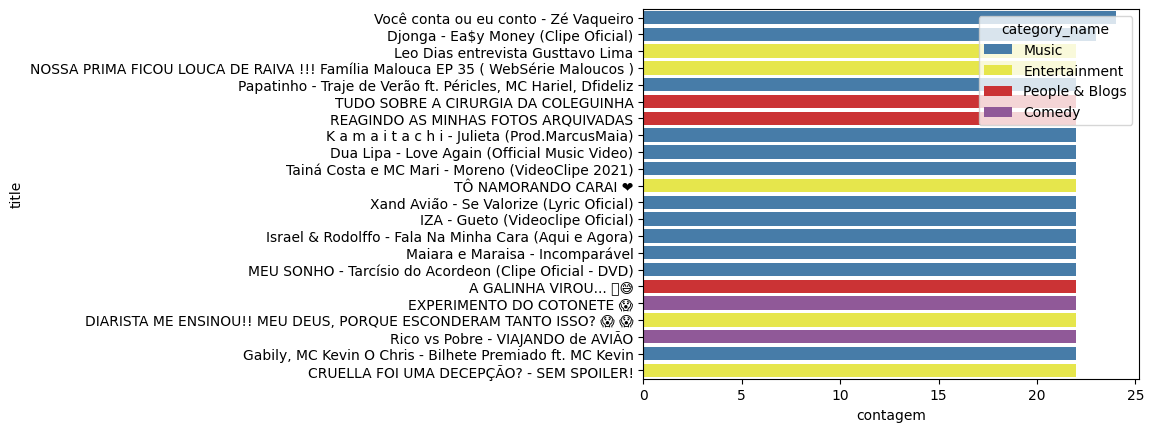

In [17]:
#tingir por categoria
sns.barplot(data=sorted_counts[sorted_counts.contagem >= 22], y='title', x='contagem', hue='category_name', dodge=False, palette=clrs)

#### 3 - Qual Categoria mais assistida? (TOP 5)

Número de vídeos em cada categoria

In [18]:
counts_categoria = df.category_name.value_counts()
counts_categoria

Entertainment            47958
Music                    43513
Gaming                   26673
Sports                   26299
People & Blogs           25075
Comedy                    8508
News & Politics           3034
Education                 2464
Science & Technology      2339
Film & Animation          2041
Autos & Vehicles          1690
Howto & Style             1433
Travel & Events            808
Pets & Animals             288
Nonprofits & Activism       68
Name: category_name, dtype: int64

Número de vídeos em cada categoria considerando cada vídeo apenas uma vez

In [19]:
sorted_counts.category_name.value_counts()

Entertainment            7360
Music                    6026
Sports                   4696
Gaming                   4177
People & Blogs           3666
Comedy                   1228
News & Politics           445
Education                 407
Science & Technology      334
Film & Animation          284
Autos & Vehicles          240
Howto & Style             207
Travel & Events           117
Pets & Animals             46
Nonprofits & Activism       9
Name: category_name, dtype: int64

1- Gráfico representando o top5 considerando o total (vídeos aparecem mais de uma vez).

É importante incluir essa análise uma vez que podemos observar quantas vezes a categoria apareceu no top trending. Não filtrando por vídeo.

2- Gráfico considerando cada vídeos apenas uma vez.

Aqui, podemos observar que tem mais vídeos de sport do que de game. Mas que o gaming fica no top mais tempo.

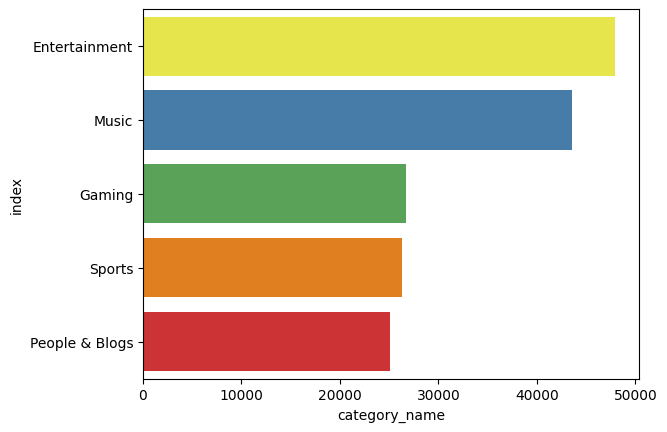

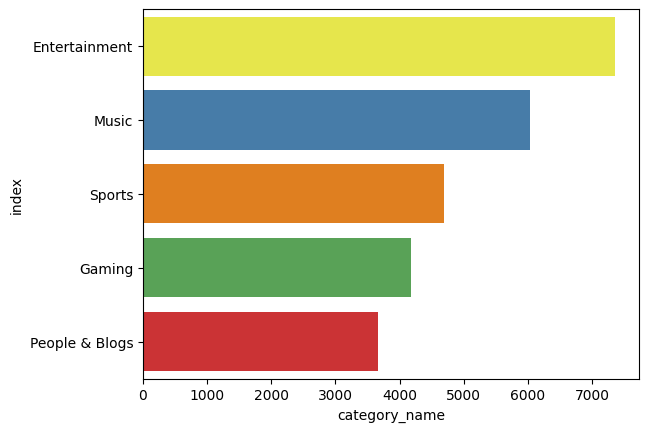

In [20]:

sns.barplot(data=pd.DataFrame(df.category_name.value_counts()).iloc[0:5].reset_index(), y='index', x='category_name', palette=clrs)
plt.show()

sns.barplot(data=sorted_counts.category_name.value_counts().iloc[0:5].reset_index(), y='index', x='category_name', palette=clrs)
plt.show()

Top 5 de Top 5

Vimos que o kpop está em tudo.

In [21]:
for i in categorias:
    print(i[1], df[df.category_name == i[1]].sort_values(by='view_count', ascending=False).title.unique()[0:5])
    print()

Film & Animation ['John Wick: Chapter 4 (2023) Final Trailer – Keanu Reeves, Donnie Yen, Bill Skarsgård'
 'Parkour - Animation vs. Minecraft Shorts Ep. 22'
 '65 –\xa0Official Trailer (HD)'
 'Sonic the Hedgehog 2 (2022) - Final Trailer - Paramount Pictures'
 'David Blaine Ascension']

Autos & Vehicles ["IONIQ x BTS - IONIQ: I'm on it Official M/V" 'WUSYANAME'
 'BROWN SUGAR SALMON' "COME ON, LET'S GO" 'Hyundai Novo HB20']

Music ["BTS (방탄소년단) 'Butter' Official MV" "BTS (방탄소년단) 'Dynamite' Official MV"
 'BLACKPINK - ‘Pink Venom’ M/V'
 "BTS (방탄소년단) 'Permission to Dance' Official MV"
 "BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V"]

Pets & Animals ['#shorts O NHOQUE FOI ESCOLHER O PRESENTE DELE. PARTE 2'
 '#shorts DESAFIO DO TAPETE 3D 🤡'
 '#shorts Fizemos uma vaquinha pra comprar CÃOXINHA'
 '#shorts ANIVERSÁRIO PET | FESTA DE HALLOWEEN DA HANNA HUSKY'
 '#shorts SEU CACHORRO NÃO GOSTA QUE PEGUE EM ALGUM LUGAR DELE?']

Sports ['Rihanna’s FULL Apple Music Super Bowl LVII Halftime Show'
 'Dr.

#### 4 - Qual canal mais assistido? Quem teve mais vídeos no top trending?

O canal mais assistido, considerando a soma do número de views de cada vídeo presente no top trending (já descartando as entradas repetidas), é o BlackPink.

<AxesSubplot: ylabel='channelTitle'>

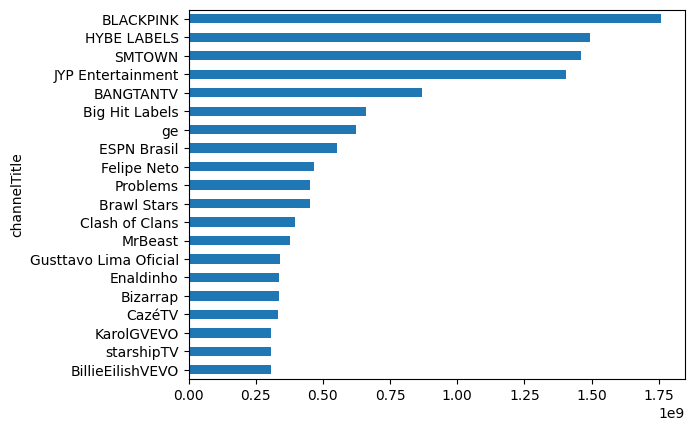

In [22]:
mais_views.view_count.groupby(mais_views.channelTitle).sum().sort_values(ascending=True).tail(20).plot(kind='barh')

O canal que teve mais aparições no top trending (considerando mais de uma vez os vídeos que ficaram vários dias), foi o ge.

<AxesSubplot: >

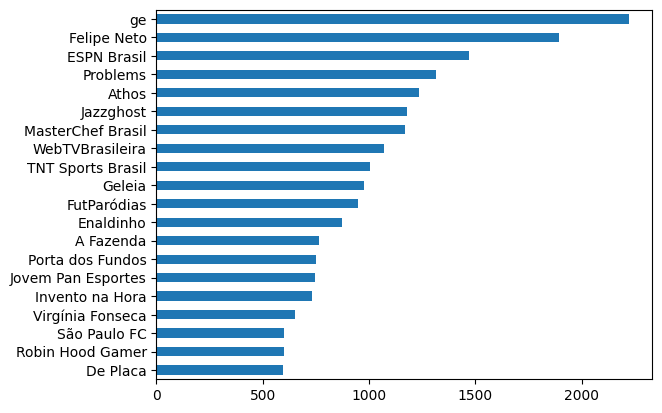

In [23]:
df.channelTitle.value_counts(ascending=True).tail(20).plot(kind='barh')

Já considerando a quantidade de vídeos de cada canal que ficaram pelo menos um dia no top trending, o 1o lugar também vai para o ge.

Mas observa-se que o felipe neto tem menos vídeos no top trending, mas fica mais dias. O contrário acontece, por exemplo, com o canal "A Fazenda", já que as fofocas duram poucos dias.

<AxesSubplot: >

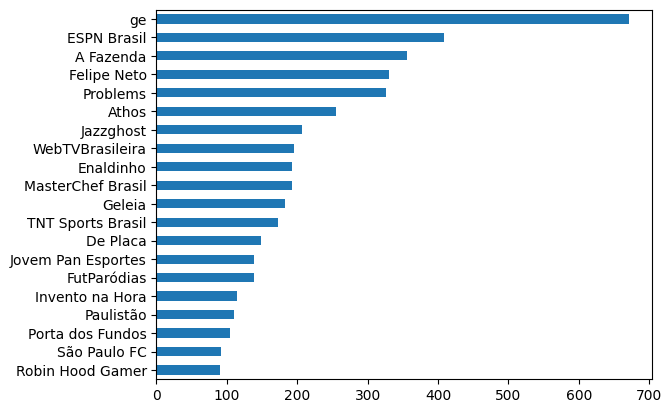

In [24]:
sorted_counts.channelTitle.value_counts(ascending=True).tail(20).plot(kind='barh')

#### 5 - Existe alguma categoria que tenha mais Likes? e Dislikes?

Esses gráficos apresentam a distribuição de views, likes, dislikes e comentários para cada categoria.

Consideramos aqui o "mais_views", que não considera o mesmo vídeo mais de uma vez, o que é importante para estas análises. 

A categoria de música, tem mais de tudo.

Gaming fica em 3o lugar em views e comentários, mas não possui tantos likes e dislikes.

Observa-se que a categoria de comédias aparece em 5o lugar como mais dislikes, e não está presente no top 5 dos outros itens. Uma hipótese é que a comédia não agrada muitas pessoas, que podem ficar ofendidas (se é pra dar dislike, todo mundo faz. Like, não tanto).

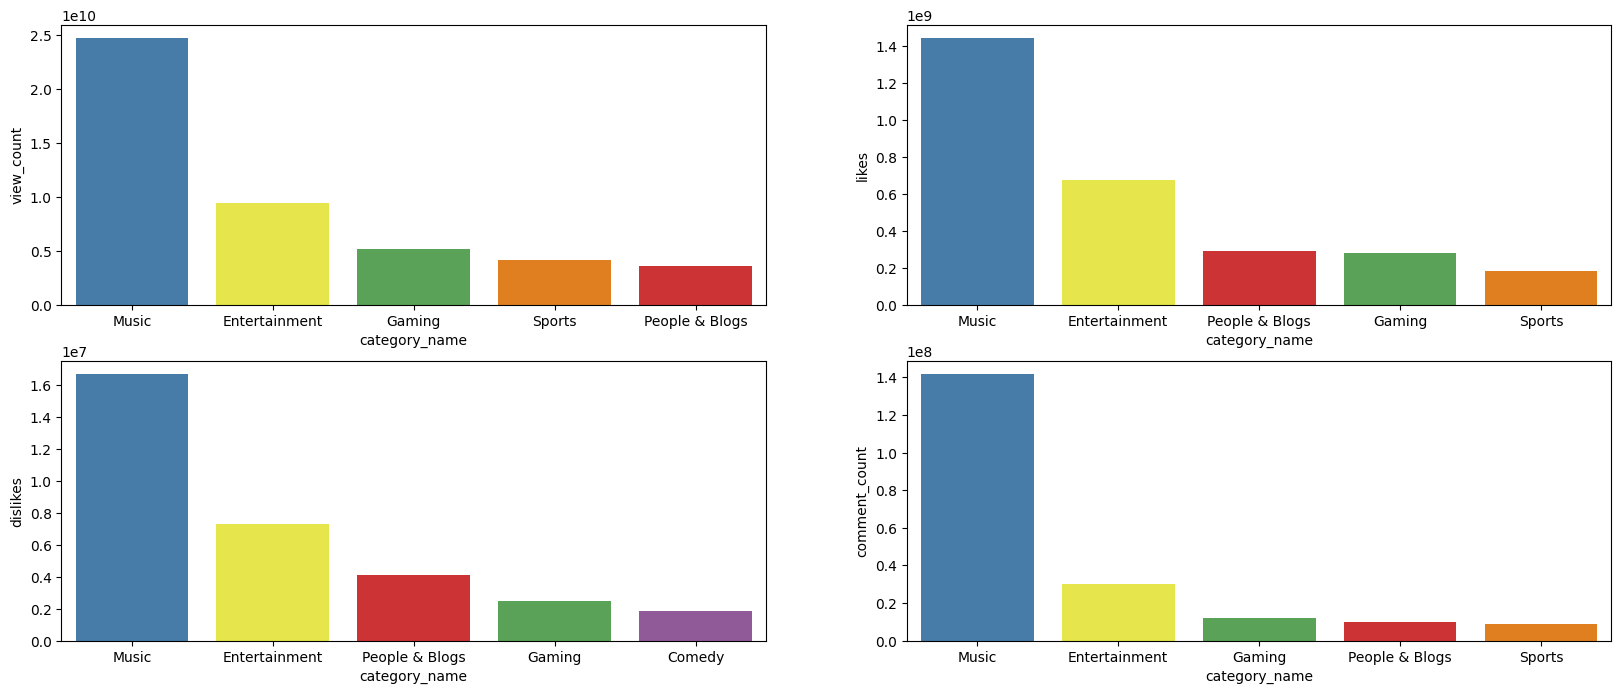

In [25]:
category_group_df = mais_views.groupby(by = mais_views['category_name']).sum()

plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(5).index
    y = category_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y, palette=clrs)

Podemos observar o nível de engajamento das pessoas que assistiram aos vídeos, por categoria. Para isso, consideramos a porcentagem de likes por views, e de dislikes por views.

A categoria com maior engajamento em ambos é a de comédia.

<AxesSubplot: ylabel='category_name'>

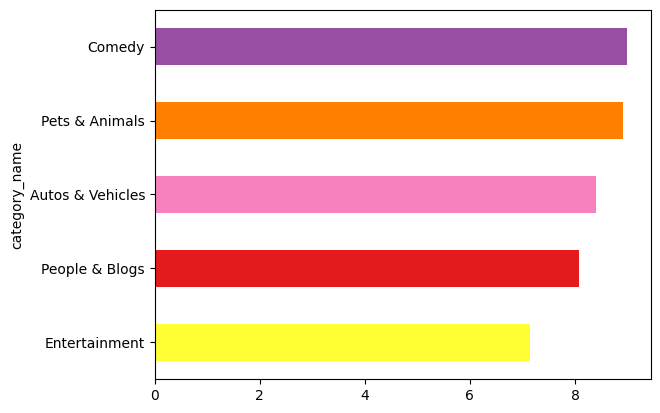

In [26]:
counts_views_likes = mais_views.groupby('category_name').agg({'category_name':'first', 'view_count': 'sum', 'likes':'sum'})
counts_views_likes['likes/views'] = counts_views_likes.likes / counts_views_likes.view_count * 100
counts_views_likes.sort_values(by='likes/views', ascending=True)['likes/views'].tail(5).plot(kind='barh', color=[clrs[key] for key in counts_views_likes.sort_values(by='likes/views', ascending=True)['category_name'].tail(5)])

<AxesSubplot: ylabel='category_name'>

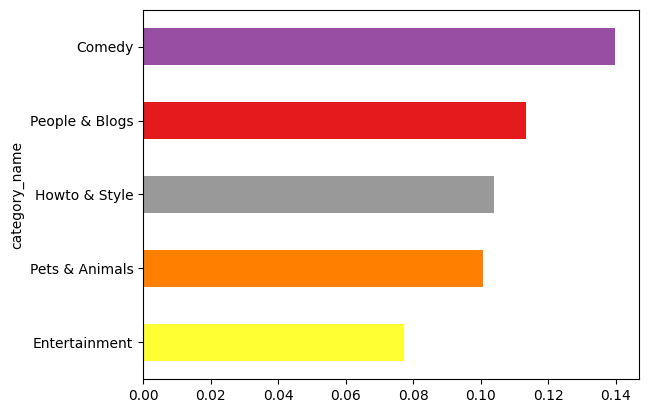

In [27]:
counts_views_dislikes = mais_views.groupby('category_name').agg({'category_name':'first', 'view_count': 'sum', 'dislikes':'sum'})
counts_views_dislikes['dislikes/views'] = counts_views_dislikes.dislikes / counts_views_dislikes.view_count * 100
counts_views_dislikes.sort_values(by='dislikes/views', ascending=True)['dislikes/views'].tail(5).plot(kind='barh', color=[clrs[key] for key in counts_views_dislikes.sort_values(by='dislikes/views', ascending=True)['category_name'].tail(5)])

Outra forma de fazer - representação numérica dos gráficos anteriores.

In [28]:
counts_likes = mais_views.groupby('category_name').agg({'category_name':'first', 'likes': 'sum'}).sort_values(by='likes', ascending=False)
counts_likes

category_name       likes
category_name                                           
Music                                  Music  1440783417
Entertainment                  Entertainment   674062906
People & Blogs                People & Blogs   292100989
Gaming                                Gaming   277828306
Sports                                Sports   180663798
Comedy                                Comedy   120931426
Science & Technology    Science & Technology    29414811
Film & Animation            Film & Animation    21048932
Education                          Education    12308990
News & Politics              News & Politics    10820412
Howto & Style                  Howto & Style    10701678
Autos & Vehicles            Autos & Vehicles     7733984
Travel & Events              Travel & Events     4669894
Pets & Animals                Pets & Animals     2642162
Nonprofits & Activism  Nonprofits & Activism      816547

In [29]:
counts_views_likes.sort_values(by='likes/views', ascending=False)

category_name   view_count       likes  \
category_name                                                           
Comedy                                Comedy   1344603922   120931426   
Pets & Animals                Pets & Animals     29612193     2642162   
Autos & Vehicles            Autos & Vehicles     92145359     7733984   
People & Blogs                People & Blogs   3613747224   292100989   
Entertainment                  Entertainment   9443793947   674062906   
Travel & Events              Travel & Events     65767760     4669894   
Music                                  Music  24733967733  1440783417   
Howto & Style                  Howto & Style    196381370    10701678   
Gaming                                Gaming   5199255812   277828306   
Sports                                Sports   4165695210   180663798   
Education                          Education    306135156    12308990   
Nonprofits & Activism  Nonprofits & Activism     20663470      816547   
Film & Animation            Film & Animation    561732623    21048932   
Science & Technology    Science & Technology    837771832    29414811   
News & Politics              News & Politics    355550400    10820412   

                       likes/views  
category_name                       
Comedy                    8.993833  
Pets & Animals            8.922548  
Autos & Vehicles          8.393243  
People & Blogs            8.083050  
Entertainment             7.137628  
Travel & Events           7.100582  
Music                     5.825120  
Howto & Style             5.449436  
Gaming                    5.343617  
Sports                    4.336942  
Education                 4.020770  
Nonprofits & Activism     3.951645  
Film & Animation          3.747144  
Science & Technology      3.511077  
News & Politics           3.043285

In [30]:
counts_dislikes = mais_views.groupby('category_name').agg({'category_name':'first', 'dislikes': 'sum'}).sort_values(by='dislikes', ascending=False)
counts_dislikes

category_name  dislikes
category_name                                         
Music                                  Music  16668305
Entertainment                  Entertainment   7304518
People & Blogs                People & Blogs   4097249
Gaming                                Gaming   2470827
Comedy                                Comedy   1880168
Sports                                Sports   1467422
Science & Technology    Science & Technology    617033
News & Politics              News & Politics    251274
Howto & Style                  Howto & Style    204273
Film & Animation            Film & Animation    201956
Education                          Education    117846
Autos & Vehicles            Autos & Vehicles     41691
Pets & Animals                Pets & Animals     29830
Travel & Events              Travel & Events     19755
Nonprofits & Activism  Nonprofits & Activism      5065

In [31]:
counts_views_dislikes = mais_views.groupby('category_name').agg({'category_name':'first', 'view_count': 'sum', 'dislikes':'sum'})
counts_views_dislikes['dislikes/views'] = counts_views_dislikes.dislikes / counts_views_dislikes.view_count * 100
counts_views_dislikes.sort_values(by='dislikes/views', ascending=False)

category_name   view_count  dislikes  \
category_name                                                         
Comedy                                Comedy   1344603922   1880168   
People & Blogs                People & Blogs   3613747224   4097249   
Howto & Style                  Howto & Style    196381370    204273   
Pets & Animals                Pets & Animals     29612193     29830   
Entertainment                  Entertainment   9443793947   7304518   
Science & Technology    Science & Technology    837771832    617033   
News & Politics              News & Politics    355550400    251274   
Music                                  Music  24733967733  16668305   
Gaming                                Gaming   5199255812   2470827   
Autos & Vehicles            Autos & Vehicles     92145359     41691   
Education                          Education    306135156    117846   
Film & Animation            Film & Animation    561732623    201956   
Sports                                Sports   4165695210   1467422   
Travel & Events              Travel & Events     65767760     19755   
Nonprofits & Activism  Nonprofits & Activism     20663470      5065   

                       dislikes/views  
category_name                          
Comedy                       0.139831  
People & Blogs               0.113380  
Howto & Style                0.104019  
Pets & Animals               0.100736  
Entertainment                0.077347  
Science & Technology         0.073652  
News & Politics              0.070672  
Music                        0.067390  
Gaming                       0.047523  
Autos & Vehicles             0.045245  
Education                    0.038495  
Film & Animation             0.035952  
Sports                       0.035226  
Travel & Events              0.030038  
Nonprofits & Activism        0.024512

#### 6 - Existe relação entre a quantidade de views, likes, dislikes e comentário?

Legenda:
- Entre 0.7 e 0.89: correlação forte;
- Entre 0.40 e 0.69: correlação moderada;
- Entre 0.1 e 0.39:correlação fraca;
- (Vermelho)- correlação desprezível por ser da variável com ela mesma

Correlação forte positiva: (views e likes)

Correlação moderada positiva: (views e comentários), (comentários e likes)


Correlação de spearman não liga para a distribuição. Assim, reflete melhor a realidade.

<AxesSubplot: >

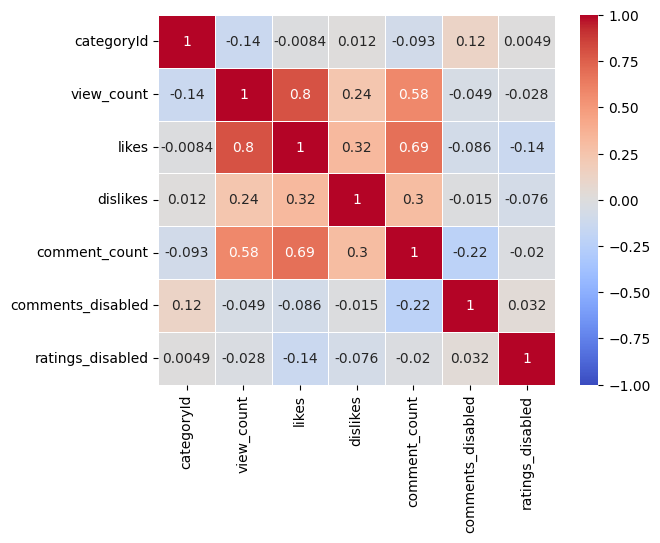

In [32]:
sns.heatmap(mais_views.corr('spearman'), vmax= 1, vmin = -1, cmap = 'coolwarm', annot = True, linewidths = 0.5)

#### 7 - Existe algum canal ou categoria que tem mais tendências a desabilitar comentários?

In [33]:
mais_views[mais_views.comments_disabled == True]

video_id                                              title  \
90584   zunoQW9sMro  TOUR PELA CASA NOVA! MOSTREI TUDO POR DENTRO E...   
163161  ztx5Wz7WwC4  Peões descobrem que Rodrigo Faro não vai mostr...   
170613  zsPIshBPyaI  Babi vence a última Prova de Fazendeiro da tem...   
156417  zqkYwDKtE2Q  Rosi sobra no Resta Um e veta Deborah da Prova...   
167600  zmdCPoYZ8tY  Confira a íntegra da votação da sede na formaç...   
...             ...                                                ...   
156308  -J8s1rb5nTU  Tiago e Tati Zaqui discutem depois de indireta...   
158443  -I67n6KKwbk  Deborah volta para a sede e é recepcionada com...   
137178  -4PGZIYsppA  Suspeitos dão detalhes de como mataram jornali...   
189982  -1vusV-3ekY  ESTOU GRÁVIDA!!🤰🏻 ESTAMOS ESPERANDO O(a) TERCE...   
63178   --zMMieVeAQ  Hytalo Santos - Marginal  (Clipe Oficial) MK n...   

                 publishedAt                 channelId    channelTitle  \
90584   2021-10-26T21:00:01Z  UCZzfUuvcCEXE0k_wI_uUN3A    Tati Barbosa   
163161  2022-10-23T23:58:09Z  UC6IV24QPvsASJbzqDbmK8gw    Hora do Faro   
170613  2022-12-08T04:53:36Z  UCw4YGFtvDgOL09KrFpqj6kg       A Fazenda   
156417  2022-09-28T04:39:51Z  UCw4YGFtvDgOL09KrFpqj6kg       A Fazenda   
167600  2022-11-23T05:43:58Z  UCw4YGFtvDgOL09KrFpqj6kg       A Fazenda   
...                      ...                       ...             ...   
156308  2022-09-23T22:40:14Z  UCw4YGFtvDgOL09KrFpqj6kg       A Fazenda   
158443  2022-10-07T03:39:37Z  UCw4YGFtvDgOL09KrFpqj6kg       A Fazenda   
137178  2022-06-16T12:20:56Z  UCwVmZjJwkCUCOes5_eAIebg     Fala Brasil   
189982  2023-03-07T18:08:09Z  UCTStSaki2Gqaau-jtLsKy2g  Josyanne Vidal   
63178   2021-06-05T22:00:11Z  UC5K2cu7OuDEUFWeRKpeSH9A   Hytalo Santos   

        categoryId         trending_date  \
90584           22  2021-11-01T00:00:00Z   
163161          24  2022-11-01T00:00:00Z   
170613          24  2022-12-09T00:00:00Z   
156417          24  2022-09-29T00:00:00Z   
167600          24  2022-11-24T00:00:00Z   
...            ...                   ...   
156308          24  2022-09-28T00:00:00Z   
158443          24  2022-10-09T00:00:00Z   
137178          25  2022-06-24T00:00:00Z   
189982          24  2023-03-15T00:00:00Z   
63178           24  2021-06-16T00:00:00Z   

                                                     tags  view_count   likes  \
90584                                              [None]       55597    9670   
163161  record|rede record|record tv|hora do faro|faro...      375613    9624   
170613  a fazenda|reality show|record tv|peões|roça|a ...      281105    7625   
156417  a fazenda|reality show|record tv|peões|roça|a ...      249570    6325   
167600  a fazenda|reality show|record tv|peões|roça|a ...      361550    7551   
...                                                   ...         ...     ...   
156308  a fazenda|reality show|record tv|peões|roça|a ...      603304   16899   
158443  a fazenda|reality show|record tv|peões|roça|a ...      339699    9911   
137178  Roberta Piza|Rede Record|Jornalismo|Record|Fal...      678051   19810   
189982                                             [None]      204671   34855   
63178                                              [None]     1995018  196834   

        dislikes  comment_count  \
90584        206              0   
163161         0              0   
170613         0              0   
156417         0              0   
167600         0              0   
...          ...            ...   
156308         0              0   
158443         0              0   
137178         0              0   
189982         0              0   
63178       5877              0   

                                        thumbnail_link  comments_disabled  \
90584   https://i.ytimg.com/vi/zunoQW9sMro/default.jpg               True   
163161  https://i.ytimg.com/vi/ztx5Wz7WwC4/default.jpg               True   
170613  https://i.ytimg.com/vi/zsPIshBPyaI/default.jpg               True   
15

In [34]:
counts_comments = mais_views[mais_views.comments_disabled == True].groupby('category_name').agg({'comments_disabled': 'size'}).sort_values(by='comments_disabled', ascending=False)
counts_comments

comments_disabled
category_name                           
Entertainment                        268
People & Blogs                        69
Education                             31
News & Politics                       30
Science & Technology                  21
Comedy                                19
Music                                 19
Gaming                                17
Travel & Events                        8
Film & Animation                       3
Nonprofits & Activism                  3
Sports                                 3
Autos & Vehicles                       1

In [51]:
fig = px.bar(data_frame = counts_comments, y = 'comments_disabled')
fig.show()

#### 8 - Vídeos que ficam mais tempo no top trendings recebe mais views que a média?

In [36]:
lista_sem_zero = mais_views[mais_views.view_count != 0].sort_values(by =['view_count'], ascending = False)
lista_sem_zero

video_id                                              title  \
57180   WMweEpGlu_U                   BTS (방탄소년단) 'Butter' Official MV   
3589    gdZLi9oWNZg                 BTS (방탄소년단) 'Dynamite' Official MV   
150369  gQlMMD8auMs                       BLACKPINK - ‘Pink Venom’ M/V   
179788  CocEMWdc7Ck                 SHAKIRA || BZRP Music Sessions #53   
68788   hdmx71UjBXs                Turn into orbeez - Tutorial #Shorts   
...             ...                                                ...   
109377  X3-DEhp15rg  #AoVivo: Sobrevoo a áreas afetadas pelas chuva...   
89966   v5bzhDzivQA         BRAGANTINO X SÃO PAULO - LIVE DO INTERVALO   
5164    RVu9I1INvF4  LIVE FECHAMENTO DE MERCADO ULTIMAS NOTICIAS TI...   
65356   bY99mgeIIuw  SNAKE EYES: GI JOE's ORIGENS | TRAILER EXPLICA...   
14182   rGGubdyVD4Y  Copa Desafiante - Série de Acesso - Temporada ...   

                 publishedAt                 channelId      channelTitle  \
57180   2021-05-21T03:46:13Z  UC3IZKseVpdzPSBaWxBxundA       HYBE LABELS   
3589    2020-08-21T03:58:10Z  UC3IZKseVpdzPSBaWxBxundA    Big Hit Labels   
150369  2022-08-19T04:00:13Z  UCOmHUn--16B90oW2L6FRR3A         BLACKPINK   
179788  2023-01-12T00:00:07Z  UCmS75G-98QihSusY7NfCZtw          Bizarrap   
68788   2021-07-03T04:04:57Z  UCt8z2S30Wl-GQEluFVM8NUw            FFUNTV   
...                      ...                       ...               ...   
109377  2022-02-01T16:07:54Z  UCjjYaSHsZSUNTSwUV8OfOrA          Planalto   
89966   2021-10-24T22:21:41Z  UCukVuQspRmzLqHk-7lxltUQ  BOTEKO DO BAROLO   
5164    2020-09-02T20:37:51Z  UCFYCk3xuCdu3-O6PXlTEQ6Q        Zord Games   
65356   2021-06-21T14:09:44Z  UC-_T97zvbTtXSQI9nVlOFrQ    Thiago Romariz   
14182   2020-10-18T00:25:19Z  UCGX5wOrJduHWrIW1tyovcAg       PUBG Brasil   

        categoryId         trending_date  \
57180           10  2021-06-01T00:00:00Z   
3589            10  2020-08-29T00:00:00Z   
150369          10  2022-08-29T00:00:00Z   
179788          24  2023-01-23T00:00:00Z   
68788           24  2021-07-15T00:00:00Z   
...            ...                   ...   
109377          25  2022-02-05T00:00:00Z   
89966           24  2021-10-29T00:00:00Z   
5164            20  2020-09-06T00:00:00Z   
65356           22  2021-06-28T00:00:00Z   
14182           20  2020-10-21T00:00:00Z   

                                                     tags  view_count  \
57180                     BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   278080610   
3589                      BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   244507902   
150369  YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   218424211   
179788  bizarrap|biza|bisa|bizzarrap|bzrp|bzrp music s...   184276781   
68788                                              [None]   175875729   
...                                                   ...         ...   
109377  governo federal|presidência da república|planalto       16430   
89966                                              [None]       15947   
5164                                               [None]       14995   
65356   thiago romariz|thiago Romariz omelete|thiago r...       14951   
14182   PUBG|playerunknowns battlegrounds|playerunknow...       10389   

           likes  dislikes  comment_count  \
57180   16213756    165082        6817450   
3589    15948422    738814        6188815   
150369  12158990         0        3353338   
179788   8717525         0         486056   
68788    5914766    180102           2273   
...          ...       ...            ...   
109377         0         0            137   
89966       2228        19             94   
5164        1566        31             10   
65356       1801        14            123   
14182        577         6              1   

                                        thumbnail_link  comments_disabled  \
57180   https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   
3589    https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
150369  https://i.ytimg.com/vi/

In [37]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mais_views.describe()

categoryId   view_count       likes  dislikes  comment_count
count    29242.00     29242.00    29242.00  29242.00       29242.00
mean        18.80   1742932.22   105551.20   1209.81        7215.55
std          5.82   6252365.70   368941.75   9358.61       80477.28
min          1.00         0.00        0.00      0.00           0.00
25%         17.00    232178.00    14940.25      0.00         447.00
50%         20.00    555482.00    33514.00     39.50        1146.50
75%         24.00   1329188.50    82397.50    528.75        2870.00
max         29.00 278080610.00 16213756.00 848980.00     6817450.00

In [38]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
lista_sem_zero.describe()

categoryId   view_count       likes  dislikes  comment_count
count    29239.00     29239.00    29239.00  29239.00       29239.00
mean        18.81   1743111.05   105562.03   1209.93        7216.29
std          5.81   6252661.53   368959.13   9359.08       80481.37
min          1.00     10389.00        0.00      0.00           0.00
25%         17.00    232189.50    14943.50      0.00         447.50
50%         20.00    555537.00    33520.00     40.00        1147.00
75%         24.00   1329362.00    82410.00    529.00        2870.50
max         29.00 278080610.00 16213756.00 848980.00     6817450.00

Respondendo a pergunta, não observamos a relação entre o número de dias no trending e a view_count.

Alguns vídeos com mais dias tem mais views que a média, e alguns não. Sendo que os vídeos com mais views não ficaram mais dias.

Text(0.5, 0, 'Dias no trending')

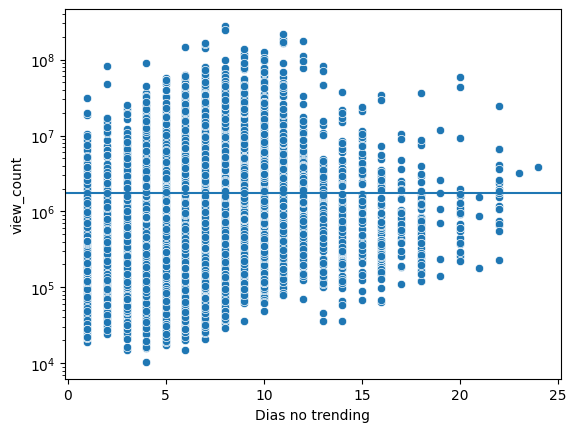

In [39]:
sns.scatterplot(data=sorted_counts, y='view_count', x='contagem')
plt.axhline(lista_sem_zero.view_count.mean())
plt.yscale('log')
plt.xlabel('Dias no trending')

Podemos observar a evolução de views dos vídeos que ficaram mais dias no top trending.

In [40]:
top_trending = df[df.video_id.isin(sorted_counts[0:5].index)]
top_trending 

video_id                                              title  \
57993  ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
57994  RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
58194  ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
58195  RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
58396  StpsccPzH2w  Papatinho - Traje de Verão ft. Péricles, MC Ha...   
...            ...                                                ...   
62772  StpsccPzH2w  Papatinho - Traje de Verão ft. Péricles, MC Ha...   
62777  Md3hQsNqQ8E                  Leo Dias entrevista Gusttavo Lima   
62787  RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
62789  ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
62790  51-6cYoQTXE  NOSSA PRIMA FICOU LOUCA DE RAIVA !!! Família M...   

                publishedAt                 channelId       channelTitle  \
57993  2021-06-03T15:00:02Z  UCNVifsYkXq5yzylNGvi1JJA             Djonga   
57994  2021-06-03T14:00:32Z  UCF1QpivnnDnbM85kPbR-sWA        Zé Vaqueiro   
58194  2021-06-03T15:00:02Z  UCNVifsYkXq5yzylNGvi1JJA             Djonga   
58195  2021-06-03T14:00:32Z  UCF1QpivnnDnbM85kPbR-sWA        Zé Vaqueiro   
58396  2021-06-04T15:00:02Z  UCI_ZJW7bnOxYhKq7sx9wyDg  Papatunes Records   
...                     ...                       ...                ...   
62772  2021-06-04T15:00:02Z  UCI_ZJW7bnOxYhKq7sx9wyDg  Papatunes Records   
62777  2021-06-04T11:23:34Z  UC9mdw2mmn49ZuqGOpSri7Fw         Metrópoles   
62787  2021-06-03T14:00:32Z  UCF1QpivnnDnbM85kPbR-sWA        Zé Vaqueiro   
62789  2021-06-03T15:00:02Z  UCNVifsYkXq5yzylNGvi1JJA             Djonga   
62790  2021-06-04T14:00:04Z  UCc-DqkU-dsAGocipGthDalg   Família Maloucos   

       categoryId         trending_date  \
57993          10  2021-06-04T00:00:00Z   
57994          10  2021-06-04T00:00:00Z   
58194          10  2021-06-04T00:00:00Z   
58195          10  2021-06-04T00:00:00Z   
58396          10  2021-06-05T00:00:00Z   
...           ...                   ...   
62772          10  2021-06-15T00:00:00Z   
62777          24  2021-06-15T00:00:00Z   
62787          10  2021-06-15T00:00:00Z   
62789          10  2021-06-15T00:00:00Z   
62790          24  2021-06-15T00:00:00Z   

                                                    tags  view_count   likes  \
57993  djonga|djongador|easy money|rap|hip hop|rap br...      443758   87979   
57994  forro|ZéVaqueiro|Forró|Cadê o amor|zé vaqueiro...      731453   79825   
58194  djonga|djongador|easy money|rap|hip hop|rap br...      633438   99318   
58195  forro|ZéVaqueiro|Forró|Cadê o amor|zé vaqueiro...      962771   90873   
58396                                          papatunes      330790   34239   
...                                                  ...         ...     ...   
62772                                          papatunes     2338202   92455   
62777  notícias|jornal|portal|metrópoles|Brasília|Bra...     1547627   88497   
62787  forro|ZéVaqueiro|Forró|Cadê o amor|zé vaqueiro...     3891488  164430   
62789  djonga|djongador|easy money|rap|hip hop|rap br...     3199605  173657   
62790  maloucos|familia maloucos|wiizinho|franzinha|f...      748207   24129   

       dislikes  comment_count  \
57993       602           4237   
57994       667           3167   
58194       786           4544   
58195       828           3583   
58396       205            943   
...         ...            ...   
62772      1115           1900   
62777      1244           4832   
62787      1849           5226   
62789      1485           6125   
62790      1266            611   

                                       thumbnail_link  comments_disabled  \
57993  https://i.ytimg.com/vi/ayKblEzrfbQ/default.jpg              False   
57994  https://i.ytimg.com/vi/RjKl3lJoWjo/default.jpg              False   
58194  https://i.ytimg.com/vi/ayKblEzrfbQ/default.jpg              False   
58195  https://i.ytimg.com/vi

Sobe muito no início, e depois a evolução é menor.

In [41]:
fig = px.line(top_trending, x="trending_date", y="view_count", color='title')
fig.show()

In [42]:
top_trending = df[df.video_id.isin(sorted_counts[sorted_counts.contagem >= 22].index)]
top_trending 

video_id                                              title  \
57599  VvqK8s7wZU8                REAGINDO AS MINHAS FOTOS ARQUIVADAS   
57801  VvqK8s7wZU8                REAGINDO AS MINHAS FOTOS ARQUIVADAS   
57993  ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
57994  RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
57996  MdhwzJmDC2s                              A GALINHA VIROU... 🐔😅   
...            ...                                                ...   
62785  7zYB8uUPu2M                          EXPERIMENTO DO COTONETE 😱   
62787  RjKl3lJoWjo               Você conta ou eu conto - Zé Vaqueiro   
62788  jBlPu5XOgoQ                TUDO SOBRE A CIRURGIA DA COLEGUINHA   
62789  ayKblEzrfbQ                Djonga - Ea$y Money (Clipe Oficial)   
62790  51-6cYoQTXE  NOSSA PRIMA FICOU LOUCA DE RAIVA !!! Família M...   

                publishedAt                 channelId      channelTitle  \
57599  2021-06-02T15:00:14Z  UCz5ZdIwF-V4nSXyNZKY2Xog        Lara Silva   
57801  2021-06-02T15:00:14Z  UCz5ZdIwF-V4nSXyNZKY2Xog        Lara Silva   
57993  2021-06-03T15:00:02Z  UCNVifsYkXq5yzylNGvi1JJA            Djonga   
57994  2021-06-03T14:00:32Z  UCF1QpivnnDnbM85kPbR-sWA       Zé Vaqueiro   
57996  2021-06-02T18:34:59Z  UCJDBsRxSr-sSHjLyZOeiG3g           Léo Léo   
...                     ...                       ...               ...   
62785  2021-06-04T00:00:26Z  UCErPmH_E-v8G51NR7uyQNvQ  André Fittipaldi   
62787  2021-06-03T14:00:32Z  UCF1QpivnnDnbM85kPbR-sWA       Zé Vaqueiro   
62788  2021-06-03T23:00:11Z  UCPa8vElq5yFo3wV6BY6HqoQ     Simone Mendes   
62789  2021-06-03T15:00:02Z  UCNVifsYkXq5yzylNGvi1JJA            Djonga   
62790  2021-06-04T14:00:04Z  UCc-DqkU-dsAGocipGthDalg  Família Maloucos   

       categoryId         trending_date  \
57599          22  2021-06-03T00:00:00Z   
57801          22  2021-06-03T00:00:00Z   
57993          10  2021-06-04T00:00:00Z   
57994          10  2021-06-04T00:00:00Z   
57996          22  2021-06-04T00:00:00Z   
...           ...                   ...   
62785          23  2021-06-15T00:00:00Z   
62787          10  2021-06-15T00:00:00Z   
62788          22  2021-06-15T00:00:00Z   
62789          10  2021-06-15T00:00:00Z   
62790          24  2021-06-15T00:00:00Z   

                                                    tags  view_count   likes  \
57599                                             [None]      204169   66810   
57801                                             [None]      290368   76094   
57993  djonga|djongador|easy money|rap|hip hop|rap br...      443758   87979   
57994  forro|ZéVaqueiro|Forró|Cadê o amor|zé vaqueiro...      731453   79825   
57996                                             [None]     1107437  108593   
...                                                  ...         ...     ...   
62785                                             Shorts     1745794  120644   
62787  forro|ZéVaqueiro|Forró|Cadê o amor|zé vaqueiro...     3891488  164430   
62788  simone|simaria|sertanejo|coleguinhas|dupla ser...     1996611  155730   
62789  djonga|djongador|easy money|rap|hip hop|rap br...     3199605  173657   
62790  maloucos|familia maloucos|wiizinho|franzinha|f...      748207   24129   

       dislikes  comment_count  \
57599       257           1880   
57801       331           2023   
57993       602           4237   
57994       667           3167   
57996      4193            784   
...         ...            ...   
62785      3049            533   
62787      1849           5226   
62788       821           4913   
62789      1485           6125   
62790      1266            611   

                                       thumbnail_link  comments_disabled  \
57599  https://i.ytimg.com/vi/VvqK8s7wZU8/default.jpg              False   
57801  https://i.ytimg.com/vi/VvqK8s7wZU8/default.jpg              False   
57993  https://i.ytimg.com/vi/ayKblEzrfbQ/default.jpg              False   
57994  https://i.ytimg.com/vi/RjKl3lJoWjo

In [43]:
fig = px.line(top_trending, x="trending_date", y="view_count", color='title')
fig.show()

Gráfico do espermatozoide.

<AxesSubplot: xlabel='view_count', ylabel='category_name'>

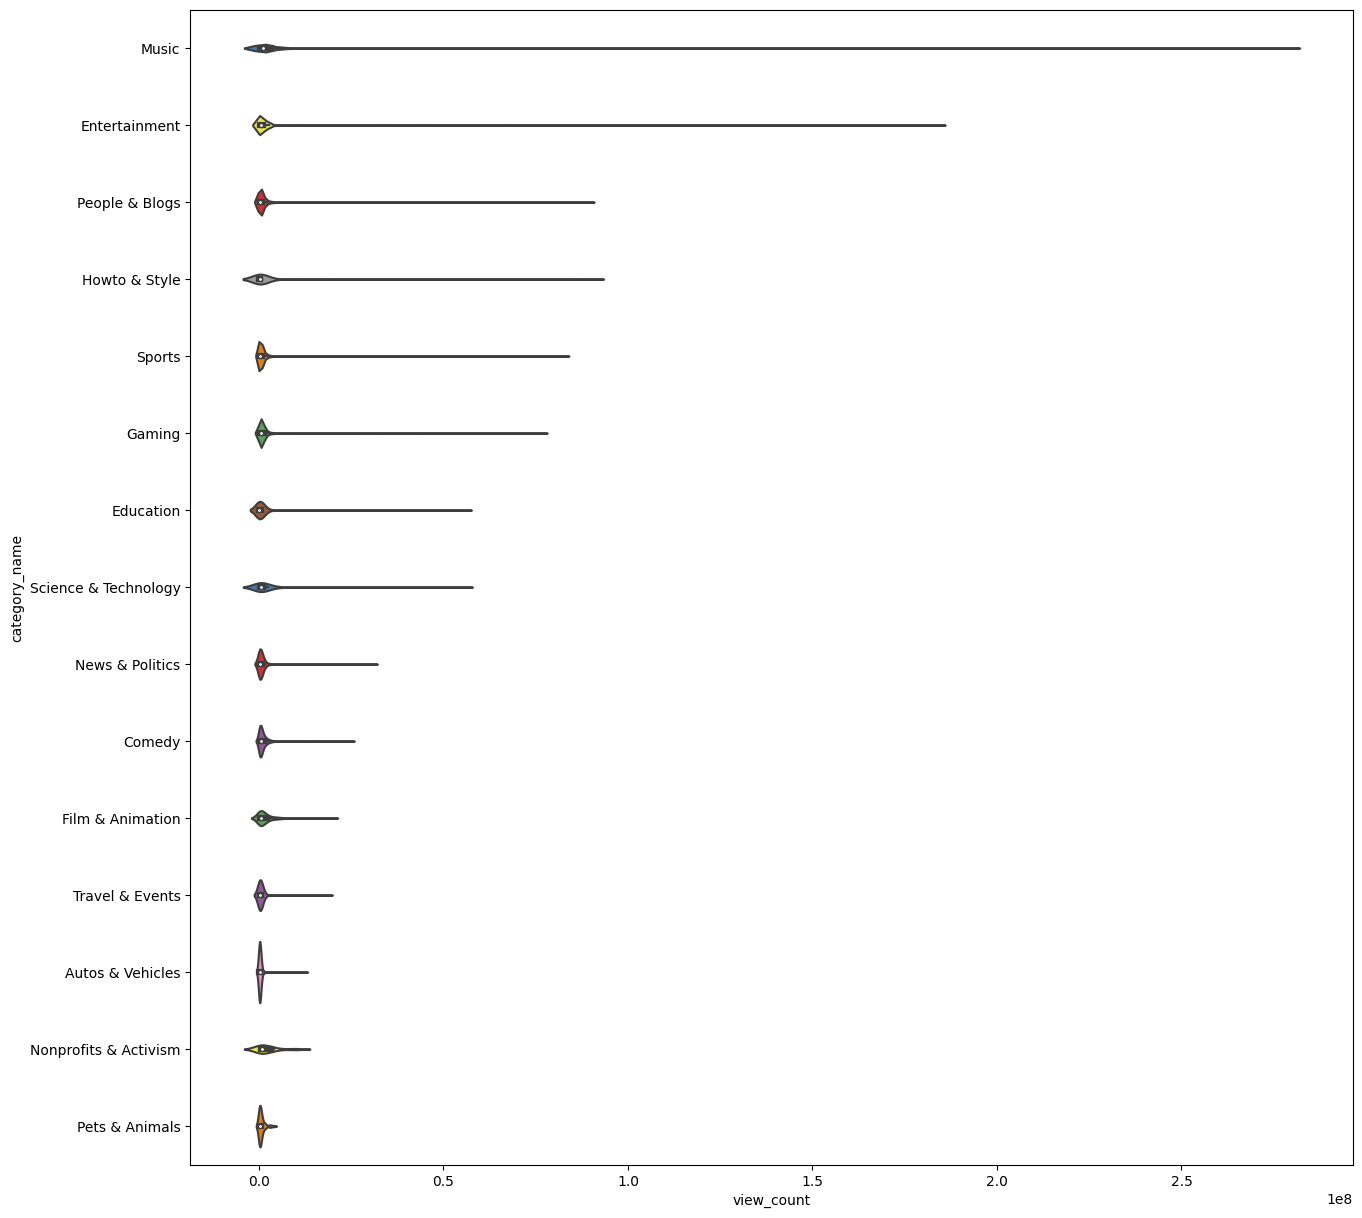

In [44]:
plt.figure(figsize=(15,15))
sns.violinplot(data=lista_sem_zero, y = 'category_name' , x='view_count', palette=clrs)

## Extras

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords
from collections import Counter

def wordCloudFunction(df,column,numWords,mask=None):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("portuguese")]
    popular_words_nonstop = [w for w in popular_words_nonstop if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                          mask=mask
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')

### Nuvem de palavras - Tags

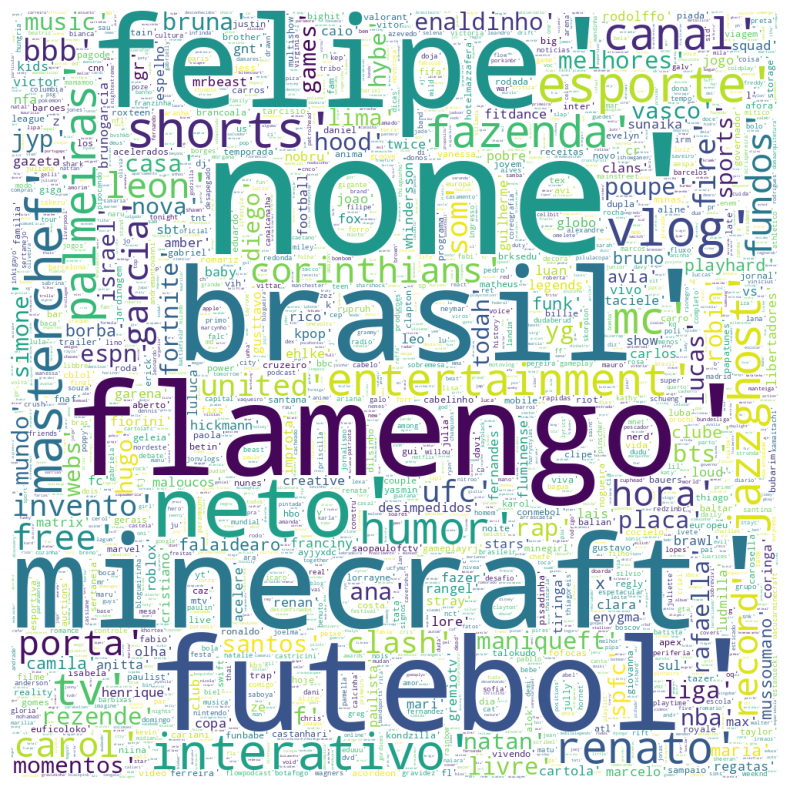

In [46]:
df['tags'] = df['tags'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

plt.figure(figsize=(10,10))
wordCloudFunction(df,'tags',10000000)

### Nuvem de palavras - Descrição

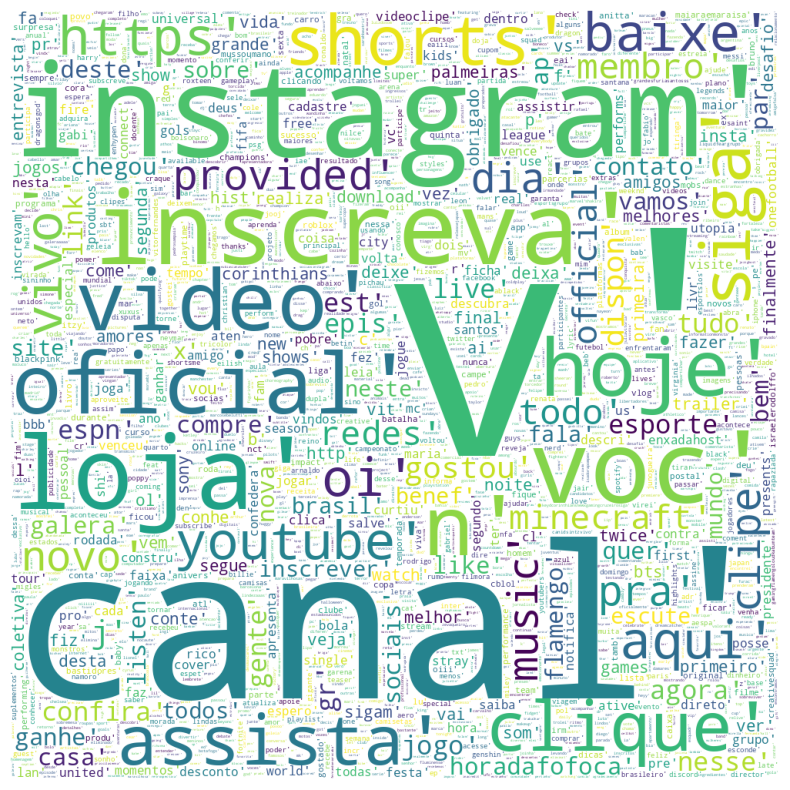

In [47]:
df['description'] = df['description'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

plt.figure(figsize=(10,10))
wordCloudFunction(df,'description',10000000)

### Thumbails dos thumbnails dos 20 mais visualizados

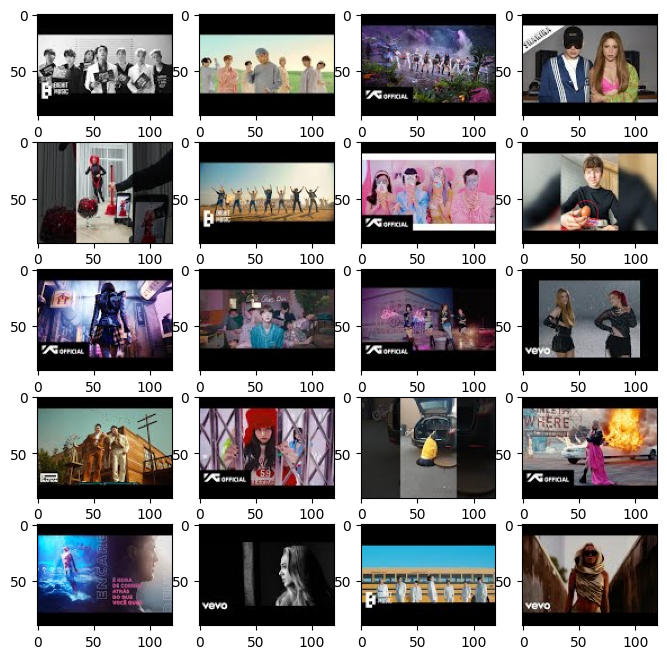

In [49]:
from IPython.display import HTML, display
from urllib.request import urlopen
from PIL import Image
import ipyplot

most_views_thumb = mais_views.sort_values(by='view_count', ascending=False)['thumbnail_link'].head(20).reset_index()['thumbnail_link']

#print(most_views_thumb)
    
images = []    

for t in most_views_thumb:
    #print(t)
    images.append(Image.open(urlopen(t)))
    

import matplotlib.pyplot as plt
fig, axes = plt.subplots(5,4, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(images[i])